In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from wordcloud import WordCloud


Loading the dataset

In [3]:
data= pd.read_csv('balanced.csv', encoding='latin-1')
# data = data[data['Sentiment'] != 'neutral']

In [4]:
data.head()

,Review,Sentiment
0,best candy corn on the planet ill keep this sh...,Positive
1,cat food my cats eat it that is all i can say ...,Positive
2,onions overwhelm otherwise lowkey flavor the o...,Negative
3,yummy tasted good spicy those that dont like s...,Positive
4,good flavor the product is the same as what we...,Positive


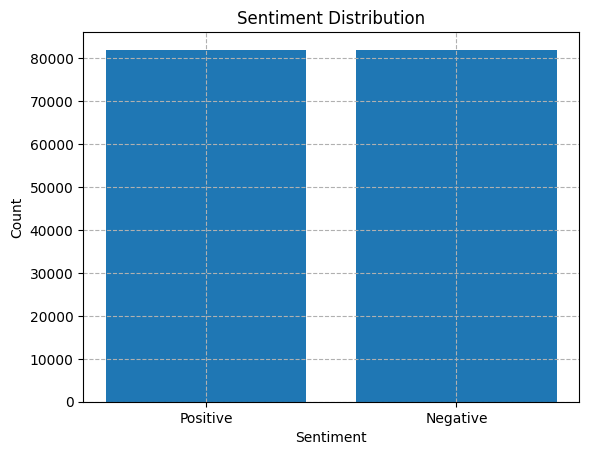

In [5]:
sentiment_counts = data['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(linestyle='--')
plt.show()

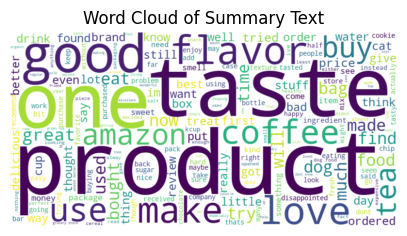

In [6]:
text = ' '.join(data['Review'].dropna())  
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white'
).generate(text) 

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.title('Word Cloud of Summary Text')
plt.show()  

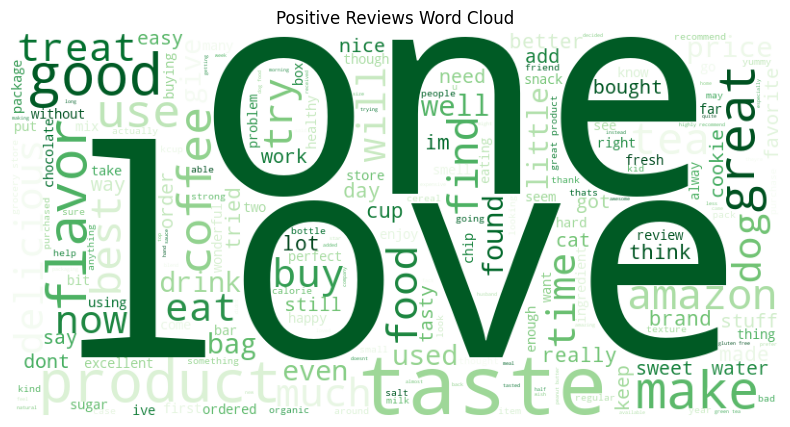

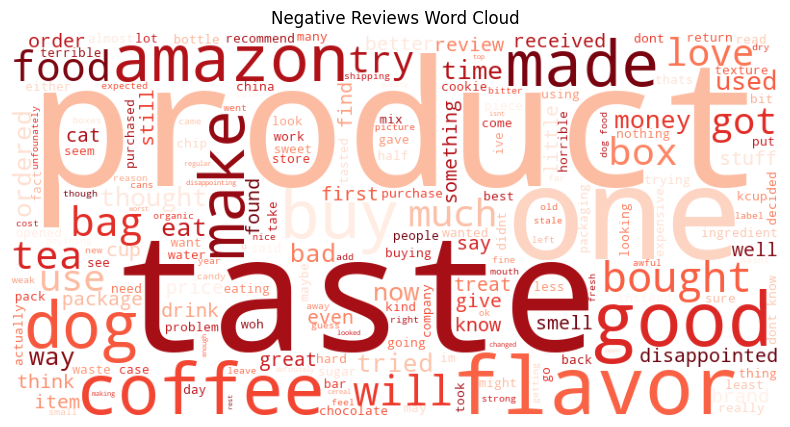

In [7]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment
for sentiment in ['Positive', 'Negative']:
    text = ' '.join(data[data['Sentiment'] == sentiment]['Review'].dropna())
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         colormap='Greens' if sentiment == 'Positive' else 
                                #  'Blues' if sentiment == 'neutral' else 
                                 'Reds').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'{sentiment.capitalize()} Reviews Word Cloud')
    plt.show()

In [8]:
data = data.dropna()
x=data['Review']
y=data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

vectorize the text data

In [9]:
vectorizer = CountVectorizer()
X_train_counts= vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


Training- MULTINOMINAL BAYES CLASSIFIER

In [10]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_counts, y_train)

MultinomialNB()

Make predections and check accuracy of the model

In [11]:
y_pred_nb = nb_classifier.predict(X_test_counts)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Multinomial Naive Bayes Accuracy", accuracy_nb)
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Multinomial Naive Bayes Accuracy 0.8786835288739906
Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88     16446
    Positive       0.87      0.89      0.88     16369

    accuracy                           0.88     32815
   macro avg       0.88      0.88      0.88     32815
weighted avg       0.88      0.88      0.88     32815



Random Forest algorithm 

In [12]:
# Train Random Forest Classifier


rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train_counts, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [29]:
import joblib
joblib.dump(rf_classifier, "rf_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [13]:
# Make predictions using Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test_counts)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Classifier Accuracy:", accuracy_rf)
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.8979430138656103
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.90      0.90     16446
    Positive       0.90      0.90      0.90     16369

    accuracy                           0.90     32815
   macro avg       0.90      0.90      0.90     32815
weighted avg       0.90      0.90      0.90     32815



In [14]:
def predict_sentiment_mt(text):
    text_counts = vectorizer.transform({text})
    prediction = nb_classifier.predict(text_counts)[0]
    return prediction

def predict_sentiment_rf(text):
    text_counts = vectorizer.transform({text})
    prediction = rf_classifier.predict(text_counts)[0]
    return prediction

In [15]:
input_text = "worst product "
predicted_sentiment = predict_sentiment_mt(input_text)
print("Predicted Sentiment : ", predicted_sentiment)

Predicted Sentiment :  Negative


In [16]:
input_text = "average product"
predicted_sentiment = predict_sentiment_rf(input_text)
print("Predicted Sentiment : ", predicted_sentiment)

Predicted Sentiment :  Positive


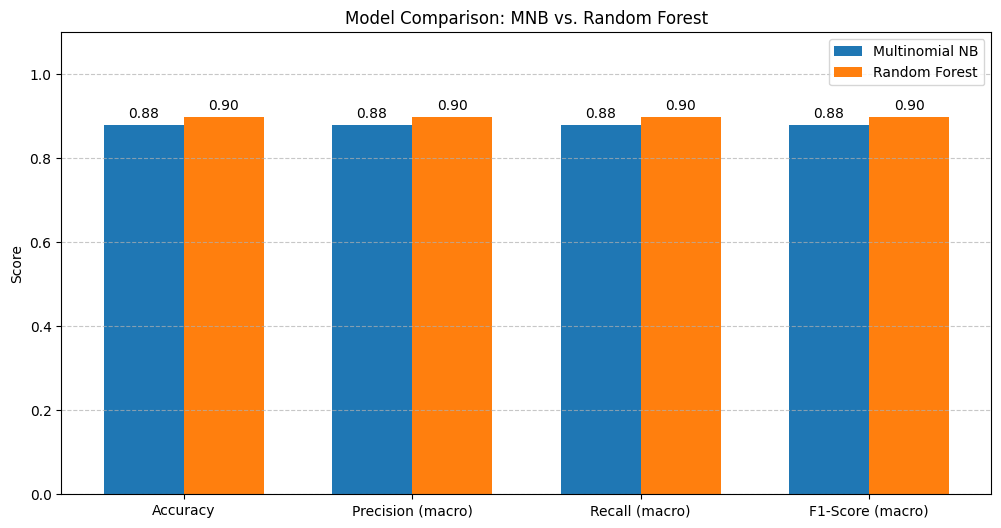

In [27]:
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Generate classification reports as dictionaries for both models
report_nb = classification_report(y_test, y_pred_nb, output_dict=True, zero_division=0)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)

# Create a metrics dictionary dynamically from the actual evaluation results
metrics = {
    'Accuracy': [report_nb['accuracy'], report_rf['accuracy']],
    'Precision (macro)': [report_nb['macro avg']['precision'], report_rf['macro avg']['precision']],
    'Recall (macro)': [report_nb['macro avg']['recall'], report_rf['macro avg']['recall']],
    'F1-Score (macro)': [report_nb['macro avg']['f1-score'], report_rf['macro avg']['f1-score']]
}

# Prepare labels and scores for plotting
labels = list(metrics.keys())
mnb_scores = [metrics[k][0] for k in labels]  # Scores for Multinomial Naive Bayes
rf_scores = [metrics[k][1] for k in labels]   # Scores for Random Forest

# Set up bar chart parameters
x = np.arange(len(labels))
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, mnb_scores, width, label='Multinomial NB', color='#1f77b4')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', color='#ff7f0e')

# Add labels and title
ax.set_ylabel('Score')
ax.set_title('Model Comparison: MNB vs. Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Annotate each bar with its value
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Set y-axis limits and add gridlines
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


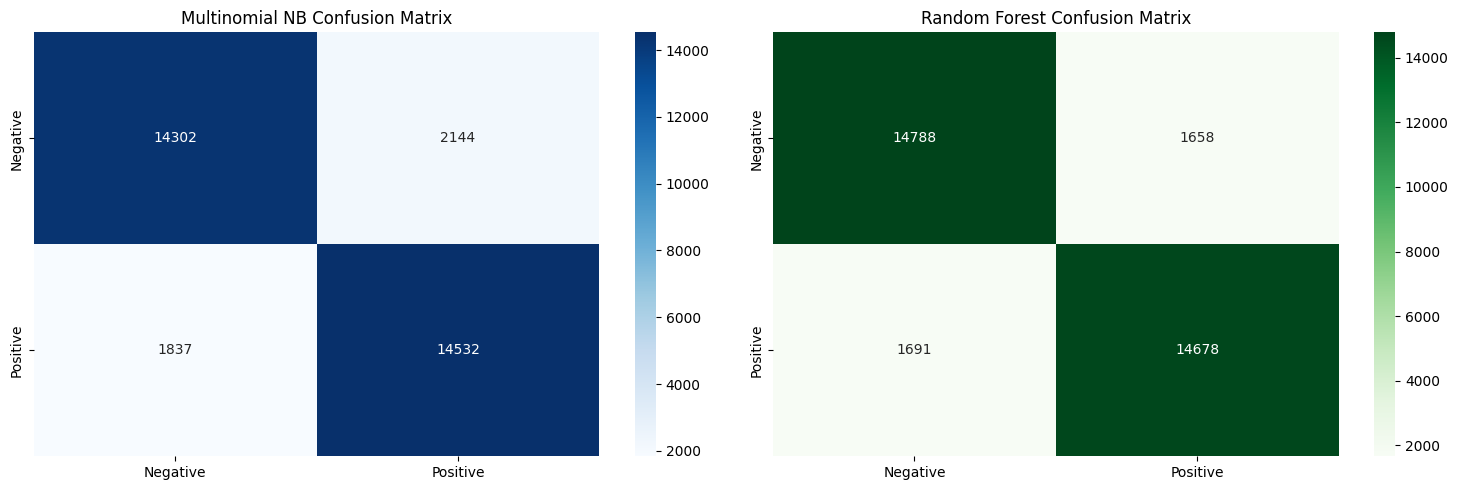

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrices
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=['Negative',  'Positive'])
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=['Negative',  'Positive'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative',  'Positive'], 
            yticklabels=['Negative',  'Positive'], ax=ax1)
ax1.set_title('Multinomial NB Confusion Matrix')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative',  'Positive'], 
            yticklabels=['Negative',  'Positive'], ax=ax2)
ax2.set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

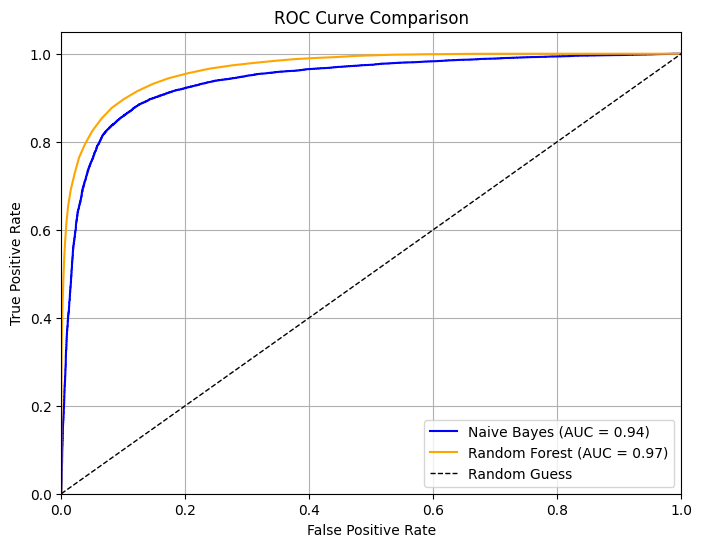

AUC - Naive Bayes: 0.9399
AUC - Random Forest: 0.9658


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test_bin = y_test.map({'Negative': 0, 'Positive': 1})

# Compute AUC and ROC for Multinomial Naive Bayes
y_proba_nb = nb_classifier.predict_proba(X_test_counts)[:, 1]  # Probability of the positive class
auc_nb = roc_auc_score(y_test_bin, y_proba_nb)
fpr_nb, tpr_nb, _ = roc_curve(y_test_bin, y_proba_nb)

# Compute AUC and ROC for Random Forest
y_proba_rf = rf_classifier.predict_proba(X_test_counts)[:, 1]
auc_rf = roc_auc_score(y_test_bin, y_proba_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, y_proba_rf)

# Plot ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Guess')  # Diagonal line for random guessing

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC values for both models
print(f"AUC - Naive Bayes: {auc_nb:.4f}")
print(f"AUC - Random Forest: {auc_rf:.4f}")
